In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
import os
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

In [2]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
data = pd.read_csv("UScomments.csv", on_bad_lines='skip')

In [4]:
data

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
...,...,...,...,...
691395,EoejGgUNmVU,Лучшая,1,0
691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0
691397,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0
691398,EoejGgUNmVU,Islığı yeter...,0,0


In [5]:
data.describe().T

,count,unique,top,freq
video_id,691400,2266,XpVt6Z1Gjjo,800
comment_text,691374,434075,Lol,310
likes,691400,1284,0,456894
replies,691400,479,0,525730


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691400 entries, 0 to 691399
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691400 non-null  object
 1   comment_text  691374 non-null  object
 2   likes         691400 non-null  object
 3   replies       691400 non-null  object
dtypes: object(4)
memory usage: 21.1+ MB


In [7]:
data.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [8]:
data.shape

(691400, 4)

In [9]:
data.dropna(inplace=True)

In [10]:
data.shape

(691374, 4)

In [11]:
data.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [12]:
data

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
...,...,...,...,...
691395,EoejGgUNmVU,Лучшая,1,0
691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0
691397,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0
691398,EoejGgUNmVU,Islığı yeter...,0,0


In [13]:
data = data.reset_index()

In [14]:
data = data.drop(['index'],axis=1)
data

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
...,...,...,...,...
691369,EoejGgUNmVU,Лучшая,1,0
691370,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0
691371,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0
691372,EoejGgUNmVU,Islığı yeter...,0,0


### Sentiment Analysis

In [20]:
pip install flair

  Using cached flair-0.13.1-py3-none-any.whl.metadata (12 kB)
Using cached flair-0.13.1-py3-none-any.whl (388 kB)
Note: you may need to restart the kernel to use updated packages.


In [15]:
from textblob import TextBlob

In [16]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity

0.0

In [17]:
polarity = []
for text in data.comment_text:
    try:
        polarity.append(TextBlob(text).sentiment.polarity)
    except:
        polarity.append(0)

In [18]:
polarity

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.8,
 -0.13571428571428573,
 0.0,
 0.2,
 -0.023333333333333352,
 0.5,
 0.0,
 0.8,
 -0.2916666666666667,
 0.0,
 0.25,
 -0.8,
 0.0,
 0.0,
 0.65,
 0.0,
 0.375,
 0.0,
 0.0,
 0.5,
 -0.04999999999999999,
 0.34448051948051944,
 0.5,
 0.6,
 0.0,
 0.0,
 -0.30625,
 0.28828125,
 -0.36458333333333337,
 0.5,
 0.012499999999999997,
 0.11904761904761905,
 0.16666666666666666,
 0.0,
 -0.4,
 -0.125,
 -0.07142857142857142,
 0.40727272727272723,
 0.0,
 0.35,
 0.0,
 -0.03415584415584416,
 -0.4,
 0.8,
 0.0,
 -0.09999999999999999,
 0.0,
 0.0,
 0.0,
 0.39999999999999997,
 0.75,
 0.0,
 -0.15555555555555556,
 0.0,
 0.0,
 0.07333333333333333,
 1.0,
 0.6083333333333333,
 0.6666666666666666,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4453125,
 -0.2,
 0.25,
 0.0,
 0.0,
 0.0,
 0.0,
 0.7,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5,
 0.25,
 0.0,
 0.8,
 0.0,
 0.6,
 0.0,
 0.875,
 0.7,
 0.45833333333333337,
 0.039077380952380954,
 0.04999999999999999,


In [19]:
data['polarity'] = polarity

In [20]:
data

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0
...,...,...,...,...,...
691369,EoejGgUNmVU,Лучшая,1,0,0.0
691370,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0,0.0
691371,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0,0.0
691372,EoejGgUNmVU,Islığı yeter...,0,0,0.0


### Wordcloud Analysis

In [21]:
filter1 = data.polarity==1

In [22]:
pos = data[filter1]
pos

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0
...,...,...,...,...,...
691347,EoejGgUNmVU,Perfect. Every version,0,0,1.0
691357,EoejGgUNmVU,Me encantaaaaa <3,0,0,1.0
691362,EoejGgUNmVU,Best song ever 🤘,0,0,1.0
691363,EoejGgUNmVU,excellent performance,0,0,1.0


In [23]:
filter2 = data.polarity==-1

In [24]:
neg = data[filter2]
neg

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0
...,...,...,...,...,...
690762,Hlt3rA-oDao,Like Kelly she evil,0,0,-1.0
690839,Ni5Uc-DdMqk,R U FUCKING KIDDING ME?!?!?!?!,11,1,-1.0
691047,4kmSATD25iY,This is horribly offensive please report,0,0,-1.0
691154,xlu6i6lT_vk,Sink holes looks terrifying sinkholes sink you...,0,0,-1.0


In [25]:
from wordcloud import WordCloud, STOPWORDS

In [26]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [27]:
data.comment_text

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691369                                               Лучшая
691370    qu'est ce que j'aimerais que tu viennes à Roan...
691371                            Ven a mexico! 😍 te amo LP
691372                                      Islığı yeter...
691373    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691374, dtype: object

In [28]:
total_pos_com = " ".join(pos.comment_text)

In [29]:
wordcloud_pos = WordCloud(stopwords=set(STOPWORDS)).generate(total_pos_com)

(-0.5, 399.5, 199.5, -0.5)

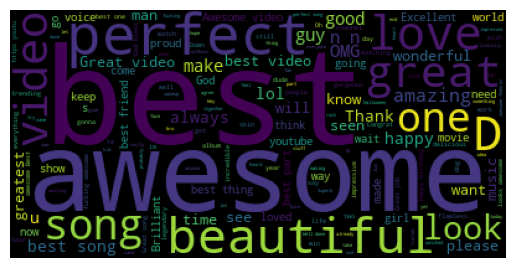

In [30]:
plt.imshow(wordcloud_pos)
plt.axis('off')

In [31]:
total_neg_com = " ".join(neg.comment_text)

In [32]:
wordcloud_neg = WordCloud(stopwords=set(STOPWORDS)).generate(total_neg_com)

(-0.5, 399.5, 199.5, -0.5)

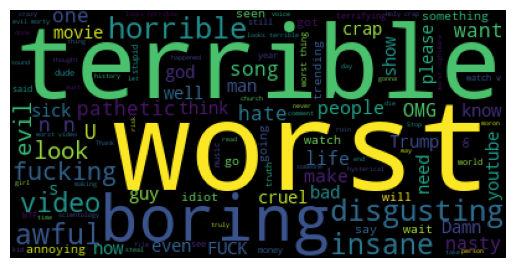

In [33]:
plt.imshow(wordcloud_neg)
plt.axis('off')

### Emoji Analysis

In [34]:
!pip install emoji

In [35]:
import emoji

In [36]:
emoji.__version__

'2.12.1'

In [37]:
data.comment_text.head(6)

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
5                              #1 on trending AYYEEEEE
Name: comment_text, dtype: object

In [38]:
a = "trending 😉"

In [39]:
# [char for char in a if char in emoji.EMOJI_DATA]
# This above line of code is equivalent to the following:
emoji_list = []
for char in a:
    if char in emoji.EMOJI_DATA:
        emoji_list.append(char)

In [40]:
emoji_list

['😉']

In [41]:
all_emojis = []

for comment in data.comment_text.dropna():
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emojis.append(char)

In [42]:
all_emojis

['‼',
 '‼',
 '‼',
 '😉',
 '😭',
 '👍',
 '🏻',
 '❤',
 '😍',
 '💋',
 '💙',
 '👍',
 '👈',
 '😂',
 '🔥',
 '😂',
 '😂',
 '😂',
 '😂',
 '👻',
 '❤',
 '😂',
 '❤',
 '💎',
 '😆',
 '😆',
 '😆',
 '😆',
 '😆',
 '😆',
 '😁',
 '😁',
 '😁',
 '😁',
 '😁',
 '😁',
 '😁',
 '😂',
 '😂',
 '😂',
 '😂',
 '😭',
 '😒',
 '👏',
 '👏',
 '👏',
 '👏',
 '👏',
 '👏',
 '👏',
 '👏',
 '👏',
 '👏',
 '😊',
 '❤',
 '👈',
 '😂',
 '😂',
 '👌',
 '👌',
 '🤔',
 '👈',
 '😂',
 '😂',
 '😁',
 '💔',
 '😂',
 '👎',
 '👎',
 '👎',
 '👎',
 '👎',
 '🍎',
 '😤',
 '😂',
 '😂',
 '😂',
 '😂',
 '👈',
 '😭',
 '😭',
 '😭',
 '😢',
 '😢',
 '😢',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '💋',
 '💋',
 '👫',
 '💘',
 '😻',
 '💋',
 '💋',
 '💖',
 '💖',
 '💖',
 '💖'

In [43]:
pd.Series(all_emojis).value_counts()

😂    36987
😍    33453
❤    31119
🔥     8694
😭     8398
     ...  
♾        1
🤪        1
🤟        1
🧢        1
🤭        1
Name: count, Length: 1098, dtype: int64

In [44]:
from collections import Counter

In [45]:
top_10_emojis = Counter(all_emojis).most_common(10)

In [46]:
top_10_emojis

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [47]:
top_10_emojis[0]

('😂', 36987)

In [48]:
top_10_emojis[1][0]

'😍'

In [49]:
emojis = [Counter(all_emojis).most_common(10)[i][0] for i in range(10)]    

In [50]:
freq = [Counter(all_emojis).most_common(10)[i][1] for i in range(10)]

In [51]:
freq

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [52]:
trace = go.Bar(x=emojis, y=freq)

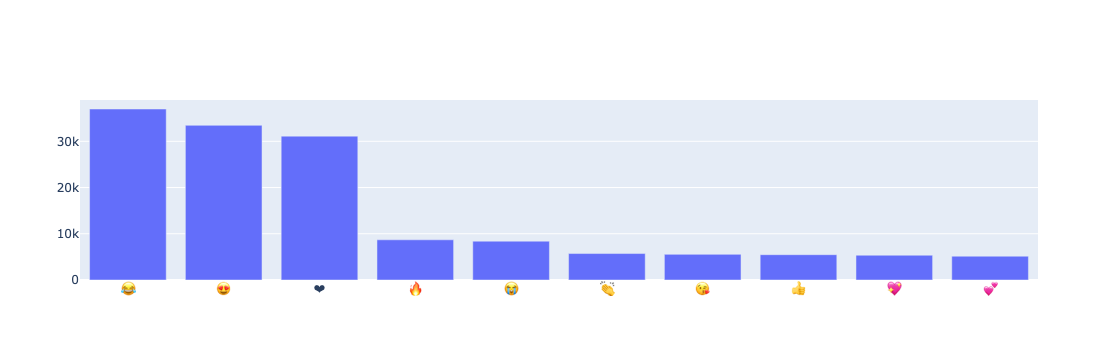

In [53]:
iplot([trace])

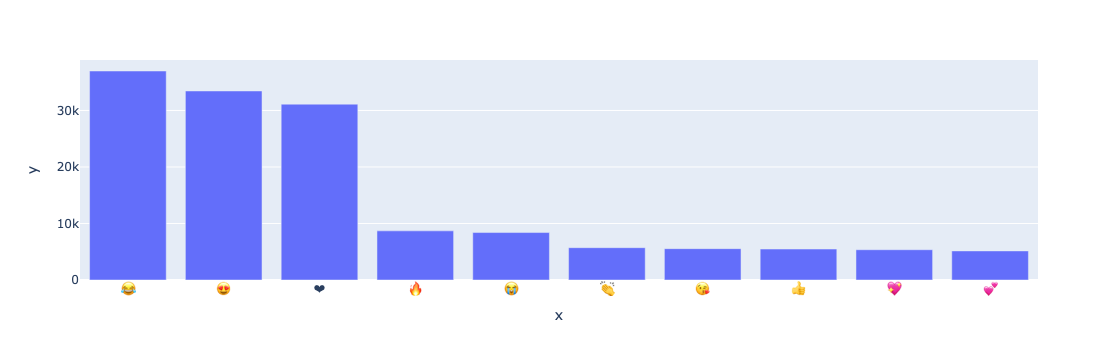

In [54]:
px.bar(x=emojis, y=freq)

##### Collect Entire data of Youtube(saved offline already)

In [55]:
sorted(os.listdir('additional_data'))

['CA_category_id.json',
 'CAvideos.csv',
 'DE_category_id.json',
 'DEvideos.csv',
 'FR_category_id.json',
 'FRvideos.csv',
 'GB_category_id.json',
 'GBvideos.csv',
 'IN_category_id.json',
 'INvideos.csv',
 'JP_category_id.json',
 'JPvideos.csv',
 'KR_category_id.json',
 'KRvideos.csv',
 'MX_category_id.json',
 'MXvideos.csv',
 'RU_category_id.json',
 'RUvideos.csv',
 'US_category_id.json',
 'USvideos.csv']

In [56]:
files = sorted(os.listdir('additional_data'))

In [57]:
files_csv = [file for file in files if '.csv' in file]

In [58]:
files_json = [file for file in files if '.json' in file]

In [59]:
files_json

['CA_category_id.json',
 'DE_category_id.json',
 'FR_category_id.json',
 'GB_category_id.json',
 'IN_category_id.json',
 'JP_category_id.json',
 'KR_category_id.json',
 'MX_category_id.json',
 'RU_category_id.json',
 'US_category_id.json']

In [60]:
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [61]:
from warnings import filterwarnings
filterwarnings('ignore')

In [62]:
full_df = pd.DataFrame()
path = 'additional_data/'

for file in files_csv:
    current_df = pd.read_csv(path+file,encoding='iso-8859-1',on_bad_lines='skip')
    full_df = pd.concat([full_df,current_df], ignore_index=True)

In [63]:
full_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375937,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
375938,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
375939,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
375940,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [64]:
full_df.shape

(375942, 16)

In [65]:
full_df.duplicated(['video_id']).sum()

191655

In [66]:
full_df.duplicated().sum()

36417

In [67]:
full_df=full_df.drop_duplicates()

In [68]:
full_df.shape

(339525, 16)

##### How to export data into (csv, json, db)

In [70]:
full_df[0:1000].to_csv(r'/Users/macbookpro/Documents/Machine Learning Projects/Youtube Text Data Analysis/youtube_sample.csv',index = 'False')

In [71]:
full_df[0:1000].to_json(r'/Users/macbookpro/Documents/Machine Learning Projects/Youtube Text Data Analysis/youtube_sample.json')

In [72]:
from sqlalchemy import create_engine

In [73]:
engine = create_engine('sqlite:////Users/macbookpro/Documents/Machine Learning Projects/Youtube Text Data Analysis/youtube_sample.sqlite')

In [74]:
full_df[0:1000].to_sql('Users', con = engine, if_exists='append')

1000

##### Which Catergory has the maximum likes

In [75]:
full_df.category_id.unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44])

In [76]:
json_df = pd.read_json(path+'US_category_id.json')
json_df

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [77]:
json_df['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [78]:
json_df['items'][0]['snippet']['title']

'Film & Animation'

In [79]:
cat_dict = {}
for item in json_df['items'].values:
    cat_dict[int(item['id'])] = item['snippet']['title']

In [80]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [81]:
full_df['category_name'] = full_df.category_id.map(cat_dict)

In [82]:
full_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375936,1PhPYr_9zRY,18.14.06,BTS Plays With Puppies While Answering Fan Que...,BuzzFeed Celeb,22,2018-05-18T16:39:29.000Z,"BuzzFeed|""BuzzFeedVideo""|""Puppy Interview""|""pu...",8259128,645888,4052,62610,https://i.ytimg.com/vi/1PhPYr_9zRY/default.jpg,False,False,False,"BTS with the PPS, the puppies. These adorable ...",People & Blogs
375938,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,People & Blogs
375939,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,Entertainment
375940,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,Film & Animation


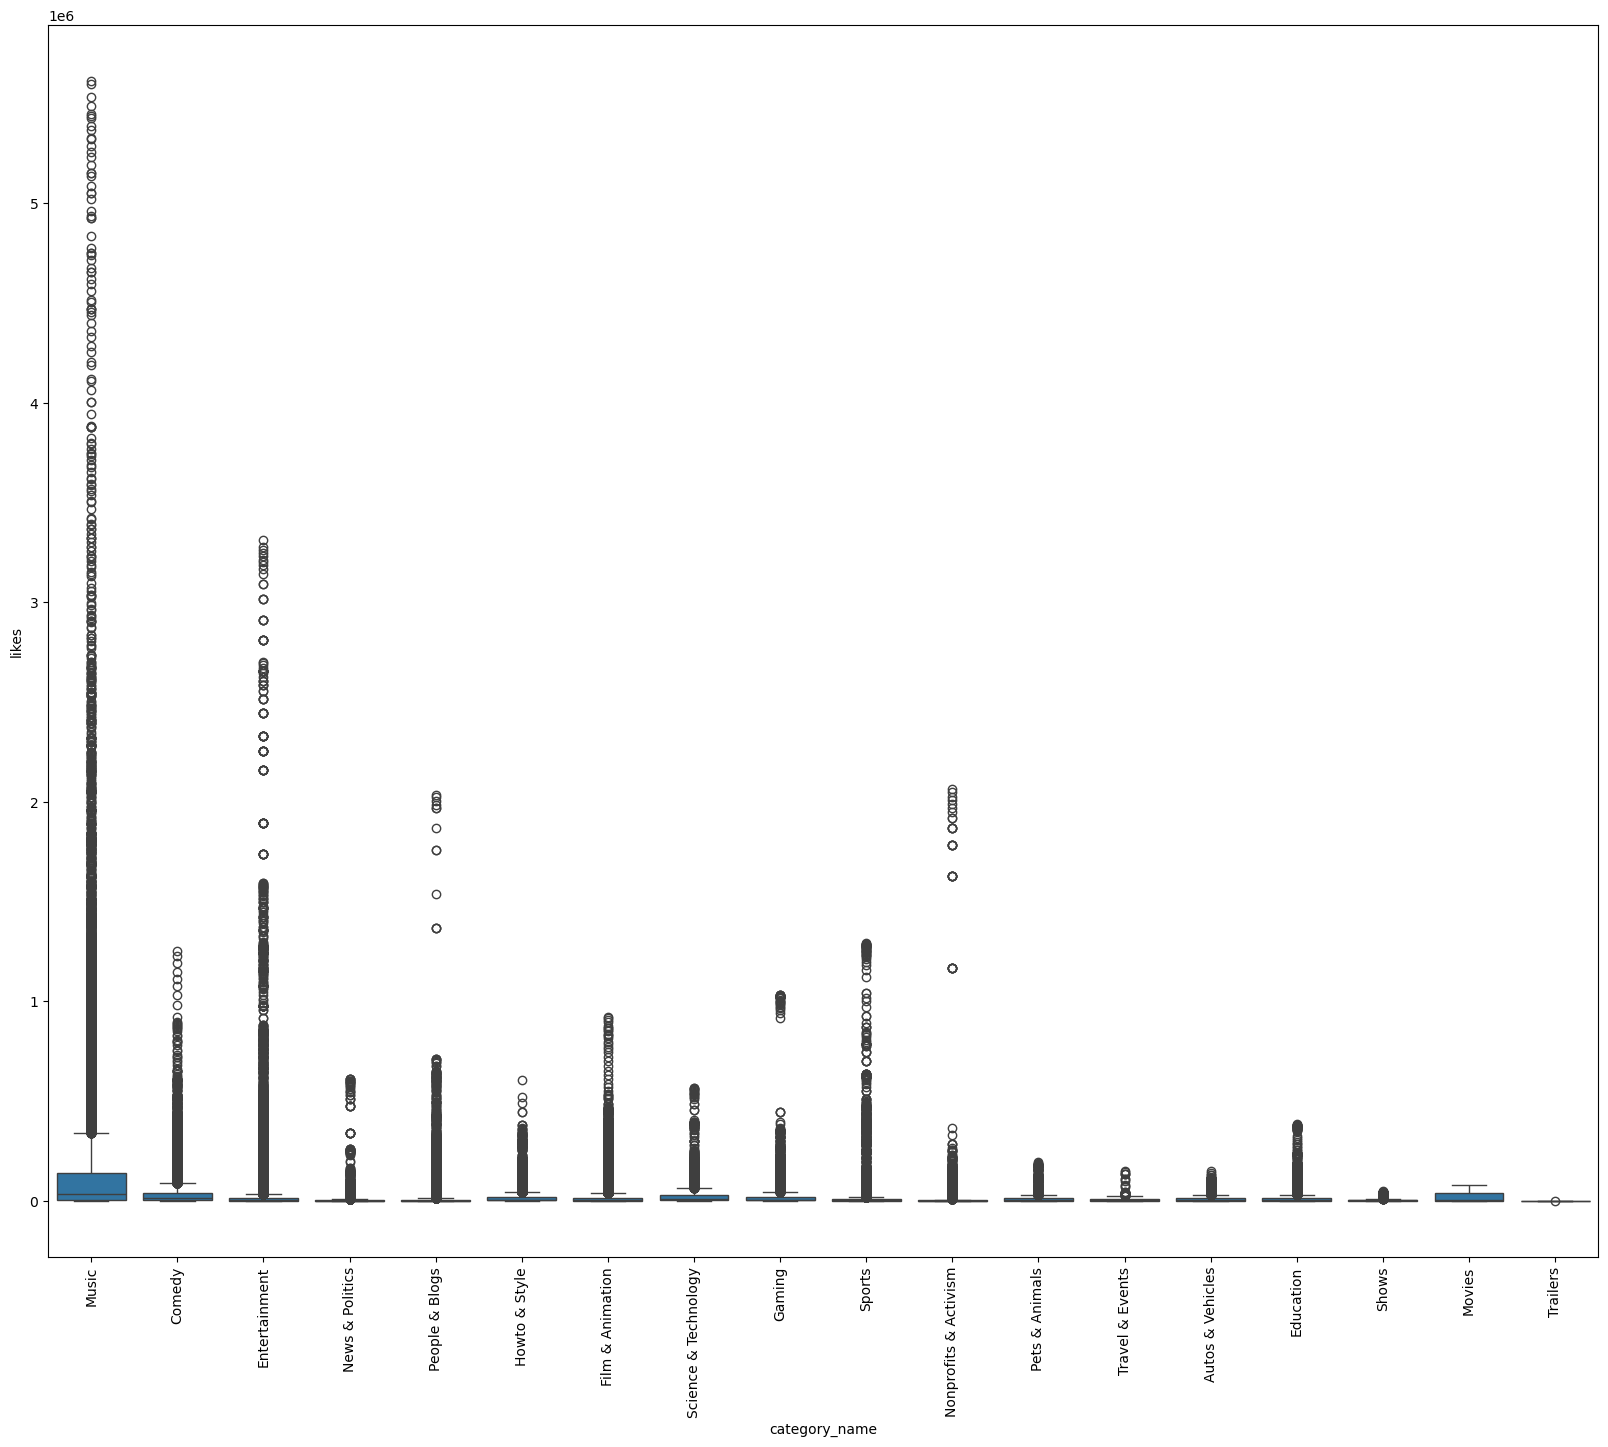

In [104]:
plt.figure(figsize=(20,16))
sns.boxplot(x='category_name', y='likes', data=full_df)
plt.xticks(rotation=90)
plt.show()

##### Find out whether the audience is engaged or not

In [86]:
df = full_df.copy()

In [89]:
df['like_rate']=(df.likes/df.views)*100
df['dislike_rate']=(df.dislikes/df.views)*100
df['comment_count_rate']=(df.comment_count/df.views)*100

In [91]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

In [92]:
full_df = df

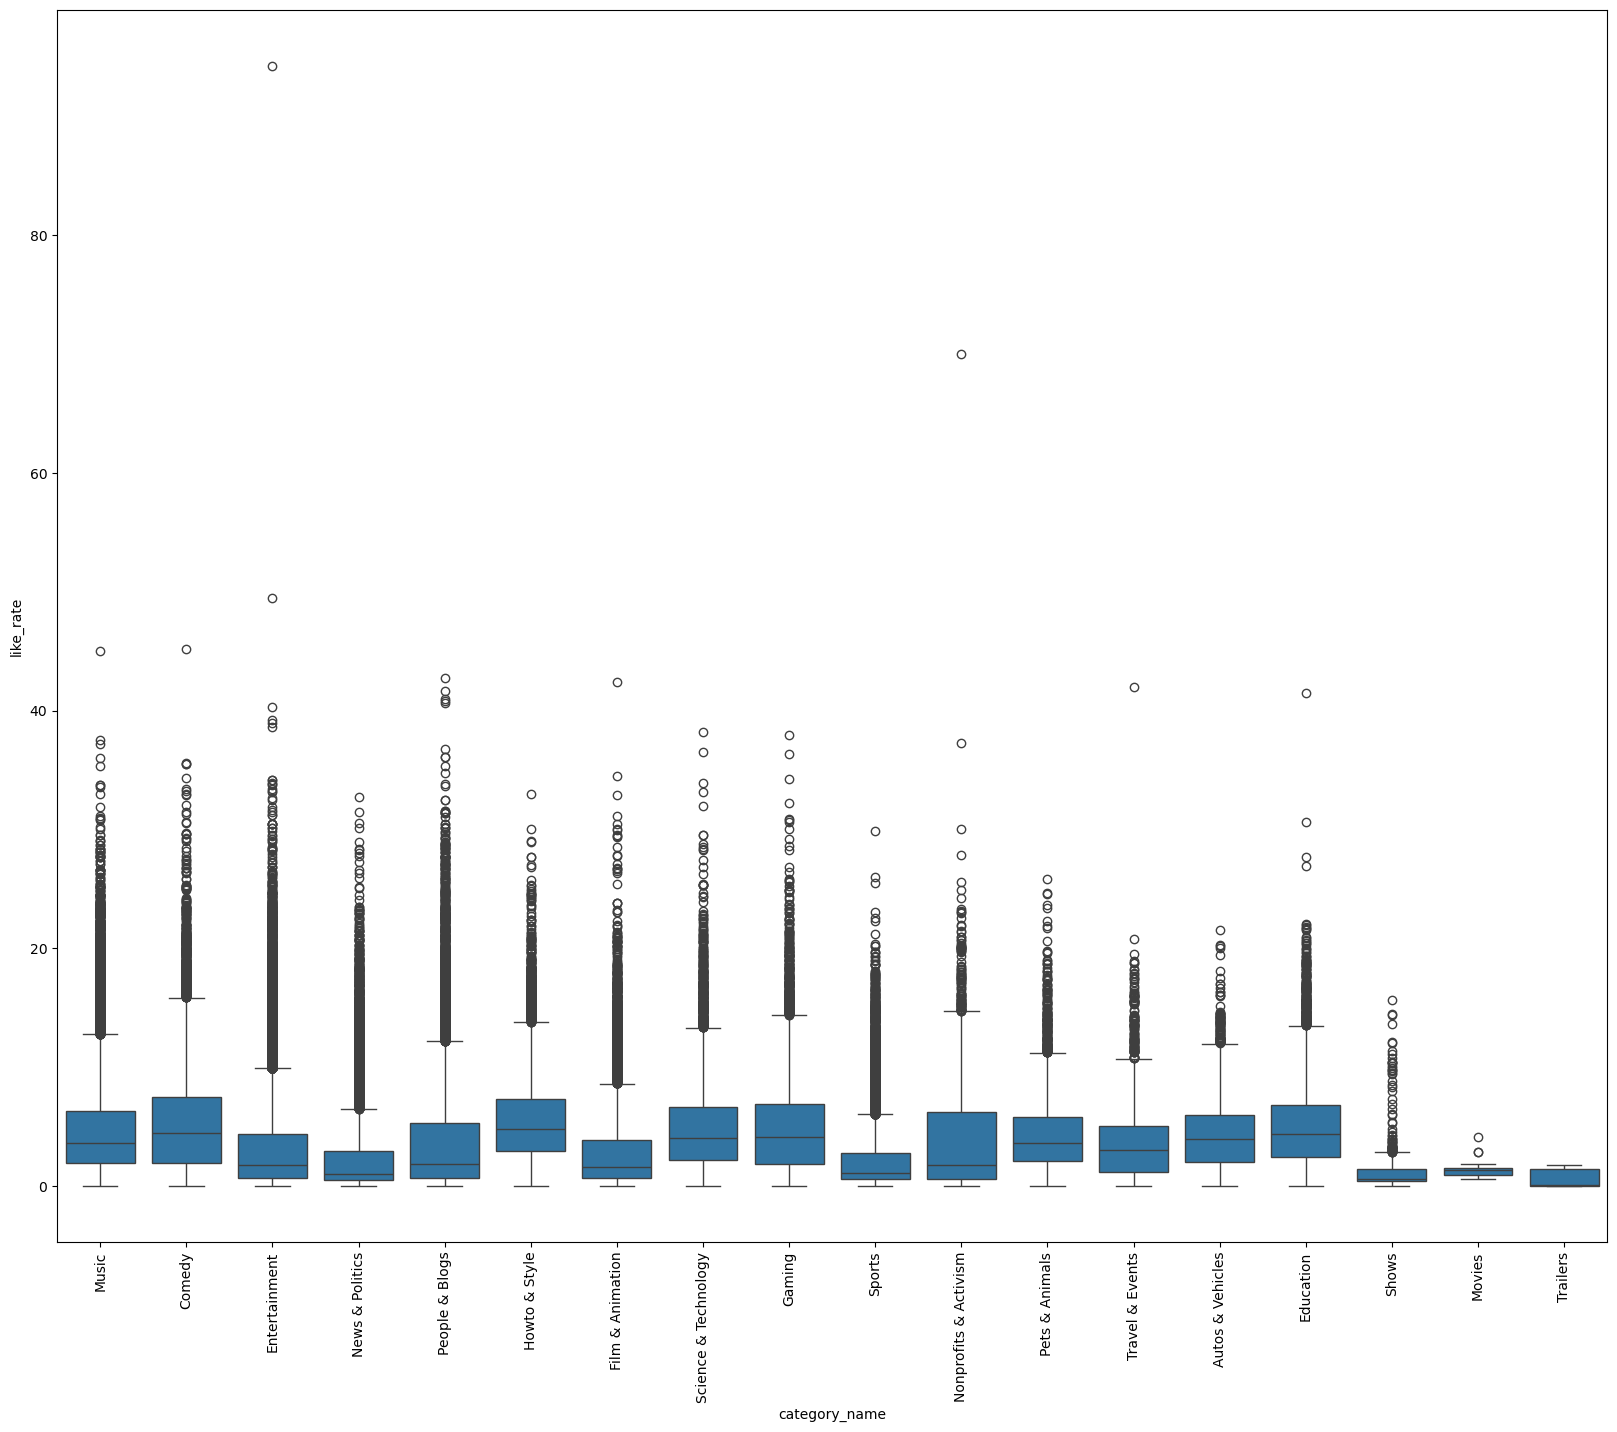

In [101]:
plt.figure(figsize=(20,16))
sns.boxplot(x='category_name', y='like_rate', data=full_df)
plt.xticks(rotation=90)
plt.show()

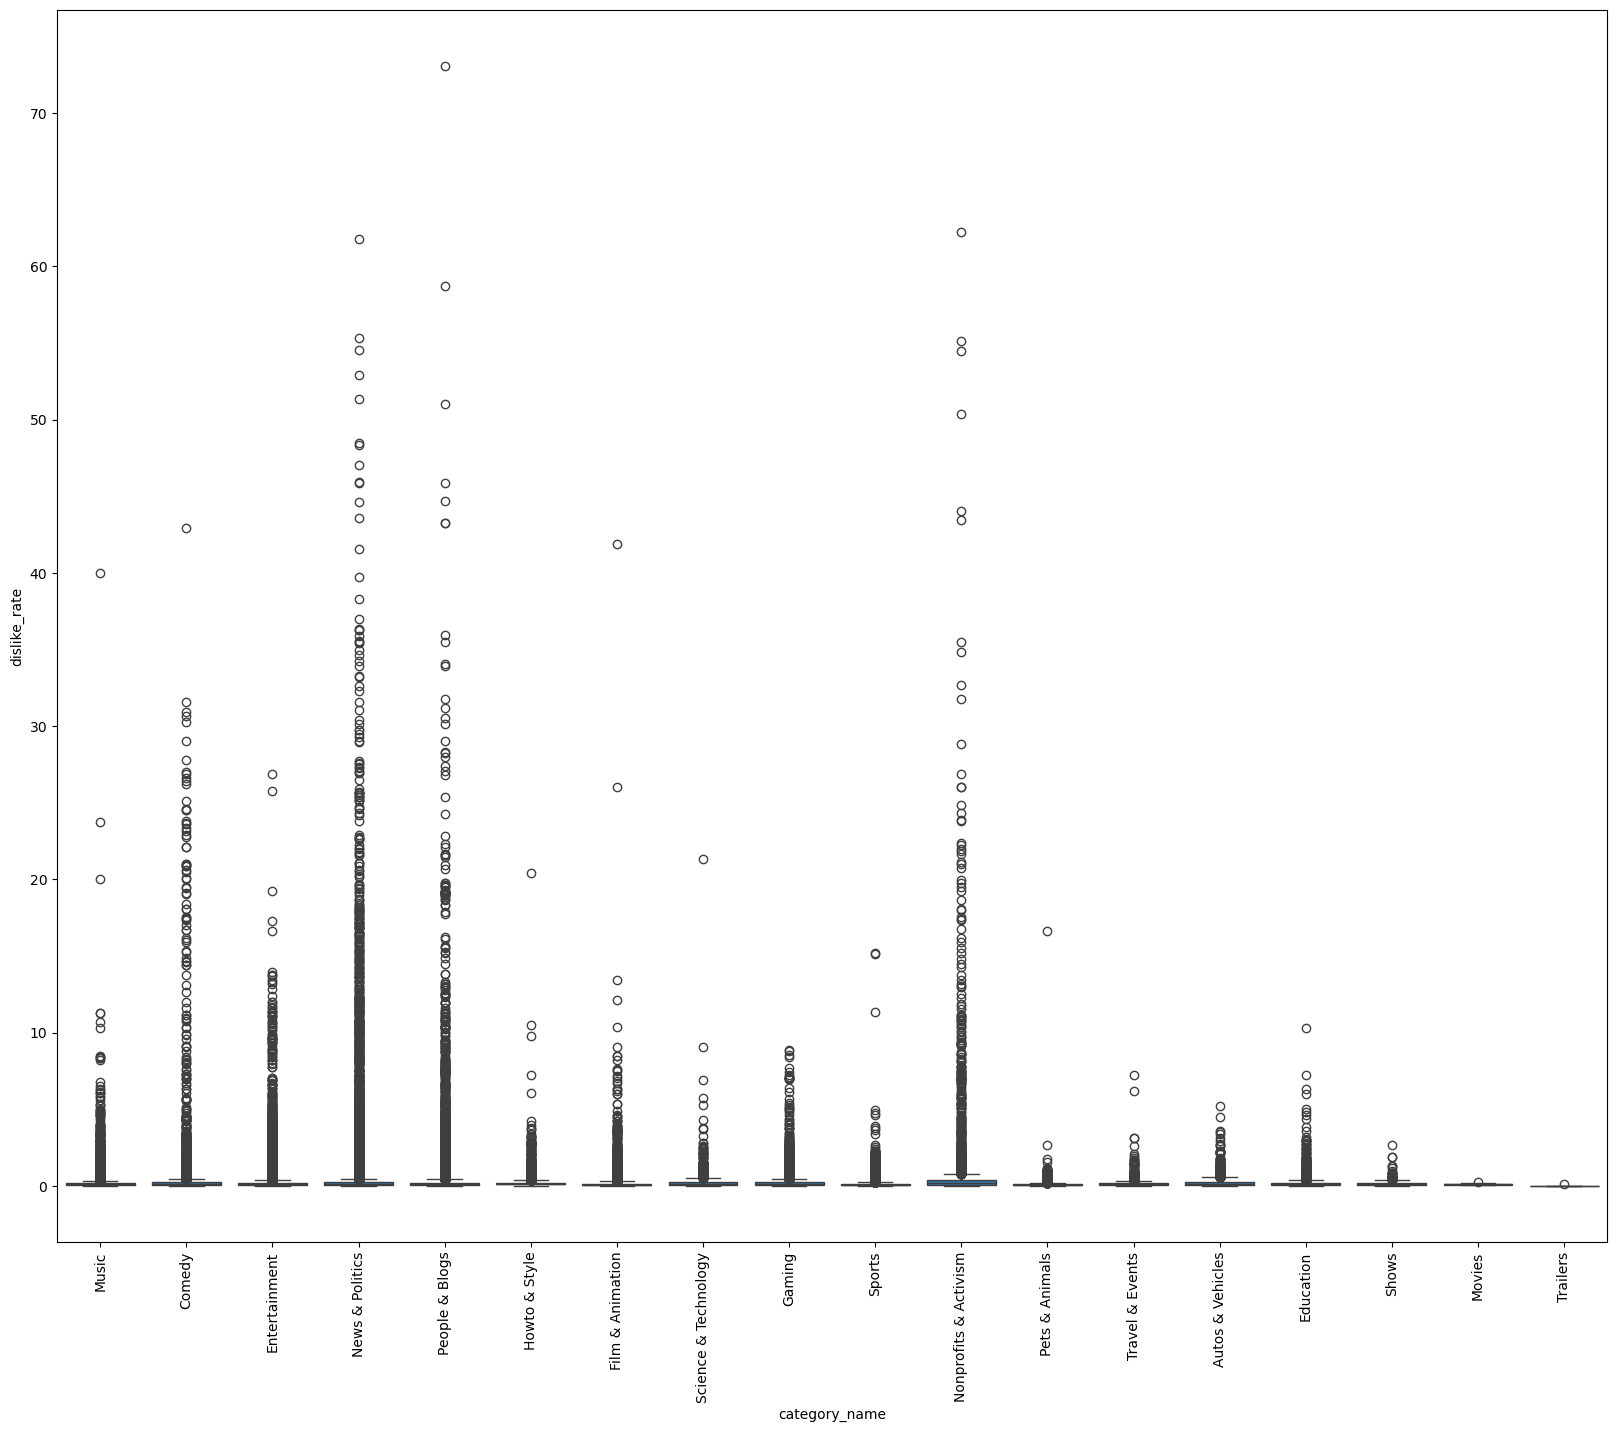

In [102]:
plt.figure(figsize=(20,16))
sns.boxplot(x='category_name', y='dislike_rate', data=full_df)
plt.xticks(rotation=90)
plt.show()

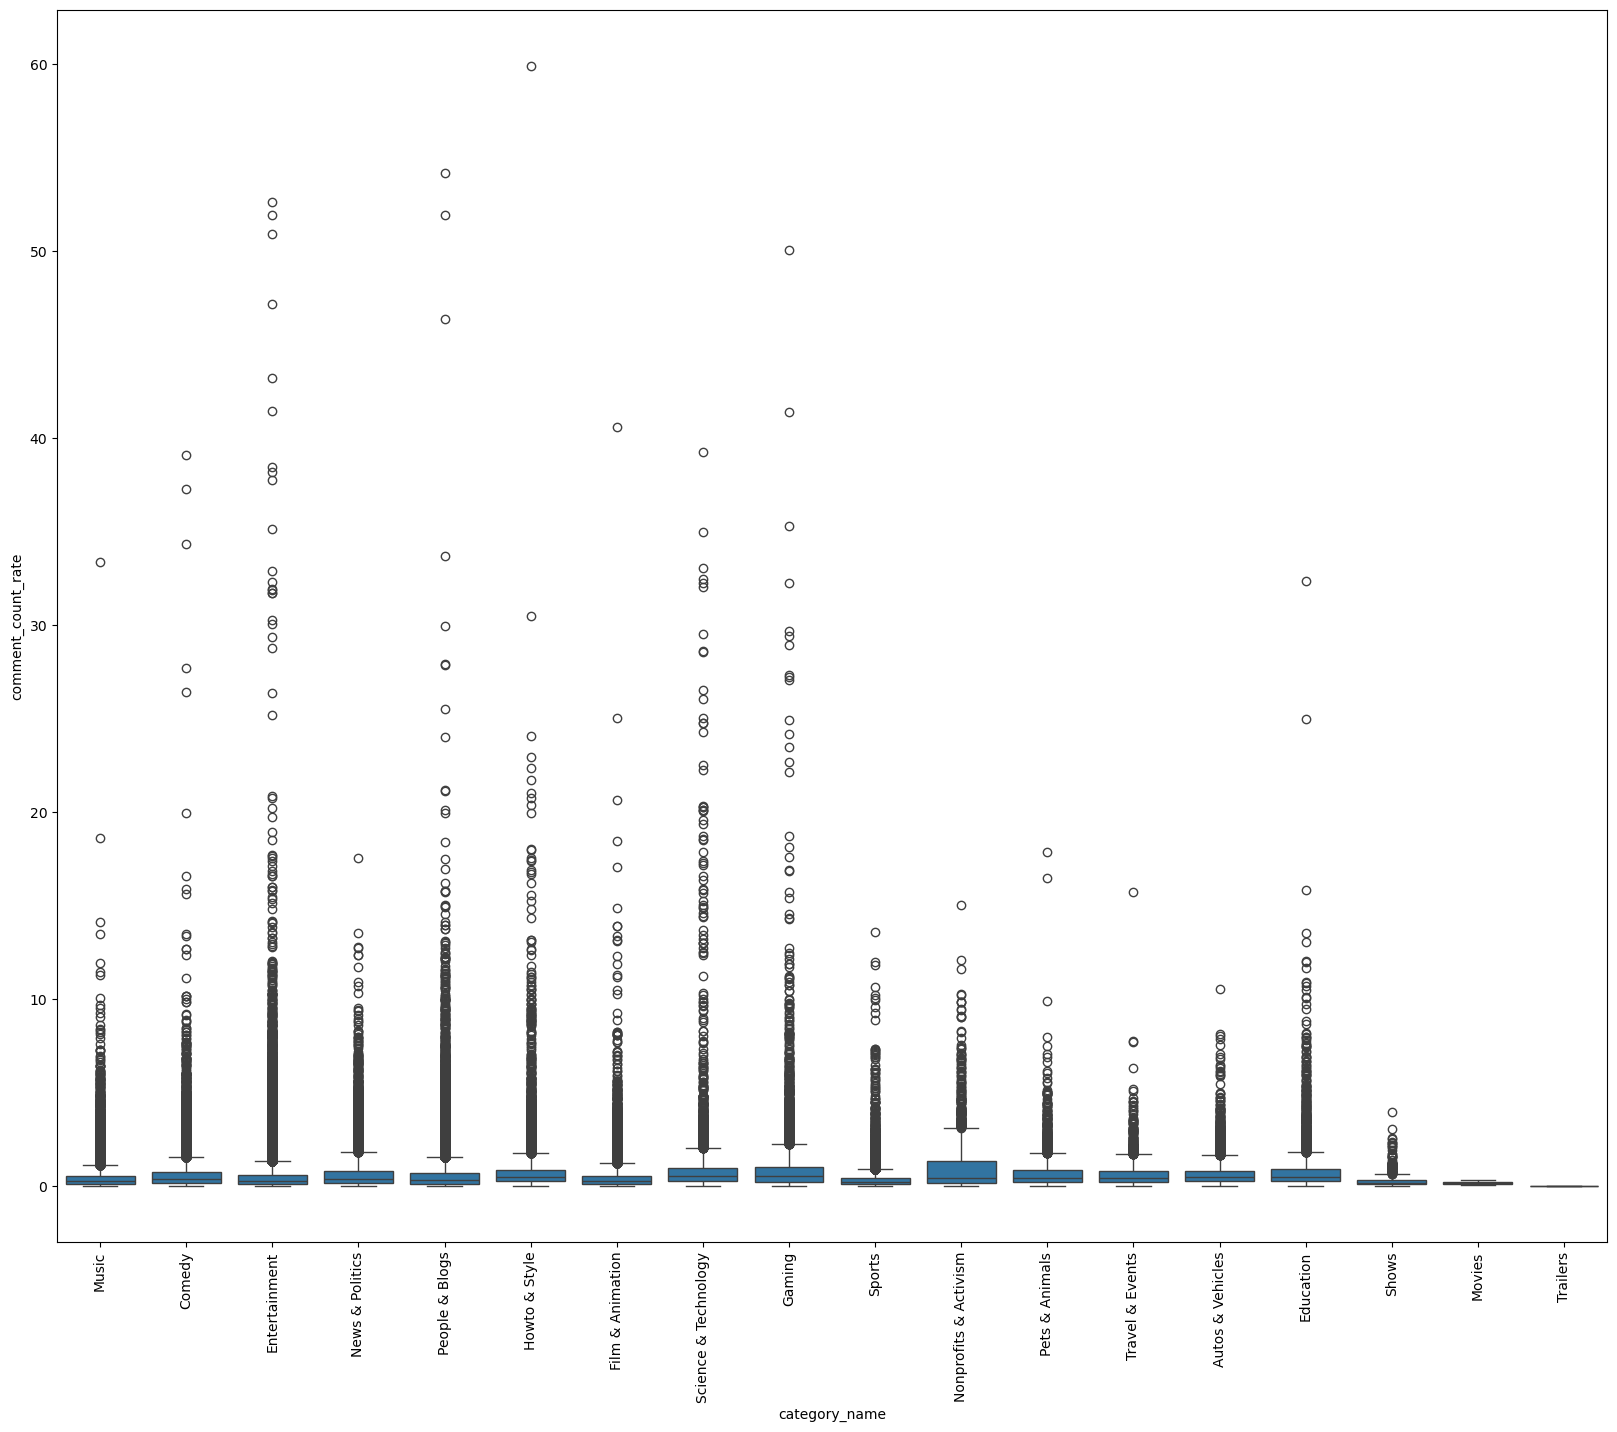

In [103]:
plt.figure(figsize=(20,16))
sns.boxplot(x='category_name', y='comment_count_rate', data=full_df)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='views', ylabel='likes'>

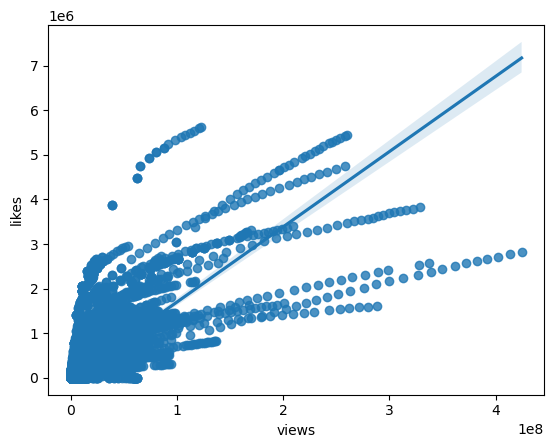

In [105]:
sns.regplot(x='views',y='likes',data=full_df)

In [106]:
#Inference - If views increase then like also increase

In [112]:
#Checking Correlation
full_df[['views','likes','dislikes']].corr()

,views,likes,dislikes
views,1.000000,0.779531,0.405428
likes,0.779531,1.000000,0.451809
dislikes,0.405428,0.451809,1.000000


In [111]:
# Inference - If views increase by 100, then likes increase by 78 and dislikes by 40

<Axes: >

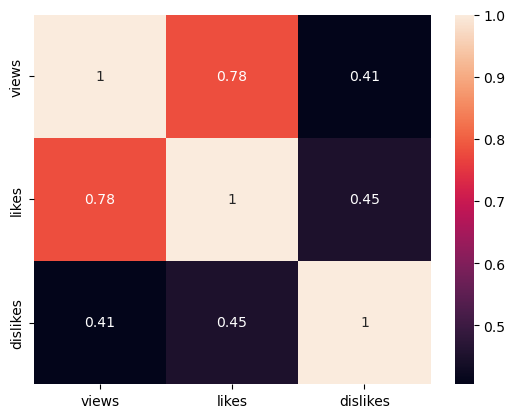

In [110]:
sns.heatmap(full_df[['views','likes','dislikes']].corr(), annot=True)

##### Which channels have the largest number of trending videos?

In [117]:
full_df.channel_title.value_counts()

channel_title
The Late Show with Stephen Colbert    710
WWE                                   643
Late Night with Seth Meyers           592
TheEllenShow                          555
Jimmy Kimmel Live                     528
                                     ... 
Daas                                    1
YT Industries                           1
BTLV Le mÃ©dia complÃ©mentaire          1
Quem Sabia ?                            1
Jessi Osorno                            1
Name: count, Length: 37824, dtype: int64

In [125]:
cdf = full_df.groupby(['channel_title']).size().sort_values(ascending=False).reset_index()
cdf

,channel_title,0
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Kd Malts,1
37820,Zedan TV,1
37821,Kc Kelly - Rocketprenuer,1
37822,Kbaby,1


In [127]:
cdf = cdf.rename(columns={0:'total_videos'})
cdf

,channel_title,total_videos
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Kd Malts,1
37820,Zedan TV,1
37821,Kc Kelly - Rocketprenuer,1
37822,Kbaby,1


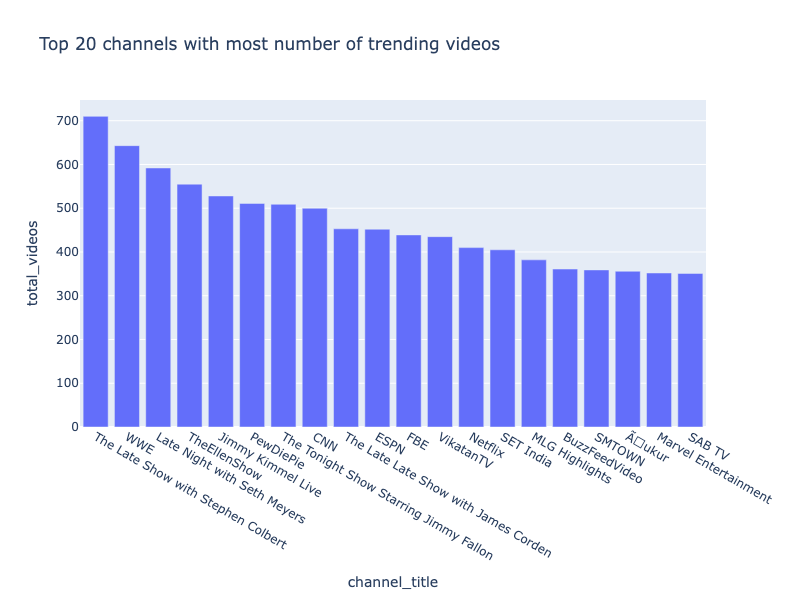

In [136]:
px.bar(cdf[:20], x = 'channel_title', y = 'total_videos',width=800, height = 600, title='Top 20 channels with most number of trending videos')

##### Does Punctuations in title and tags have any relation with views, likes, dislikes, comments

In [138]:
import string

In [143]:
full_df['title'][0]

'Eminem - Walk On Water (Audio) ft. BeyoncÃ©'

In [144]:
len([str for str in full_df['title'][0] if str in string.punctuation])

4

In [147]:
def punc_count(text):
    return len([str for str in text if str in string.punctuation])

In [151]:
full_df['title'].apply(punc_count)

0         4
1         1
2         3
3         3
4         3
         ..
375936    0
375938    1
375939    3
375940    0
375941    1
Name: title, Length: 339525, dtype: int64

In [149]:
full_df['count_punc'] = full_df['title'].apply(punc_count)

In [150]:
full_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_count_rate,count_punc
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,4.589104,0.253051,0.733639,4
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,12.594873,0.166363,1.284185,1
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,...,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy,4.575843,0.167292,0.256342,3
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,...,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,6.309630,0.094903,0.835851,3
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,...,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music,4.874563,0.062887,0.253752,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375936,1PhPYr_9zRY,18.14.06,BTS Plays With Puppies While Answering Fan Que...,BuzzFeed Celeb,22,2018-05-18T16:39:29.000Z,"BuzzFeed|""BuzzFeedVideo""|""Puppy Interview""|""pu...",8259128,645888,4052,...,https://i.ytimg.com/vi/1PhPYr_9zRY/default.jpg,False,False,False,"BTS with the PPS, the puppies. These adorable ...",People & Blogs,7.820293,0.049061,0.758070,0
375938,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,...,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,People & Blogs,5.635623,0.035875,0.369648,1
375939,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,...,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,Entertainment,4.507286,0.096770,0.374326,3
375940,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,...,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,Film & Animation,3.408645,0.050275,0.231204,0


In [152]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate', 'count_punc'],
      dtype='object')

In [155]:
d = full_df[['views','likes','dislikes','comment_count','count_punc']]

In [156]:
d

,views,likes,dislikes,comment_count,count_punc
0,17158579,787425,43420,125882,4
1,1014651,127794,1688,13030,1
2,3191434,146035,5339,8181,3
3,2095828,132239,1989,17518,3
4,33523622,1634130,21082,85067,3
...,...,...,...,...,...
375936,8259128,645888,4052,62610,0
375938,1064798,60008,382,3936,1
375939,1066451,48068,1032,3992,3
375940,5660813,192957,2846,13088,0


<Axes: xlabel='count_punc', ylabel='views'>

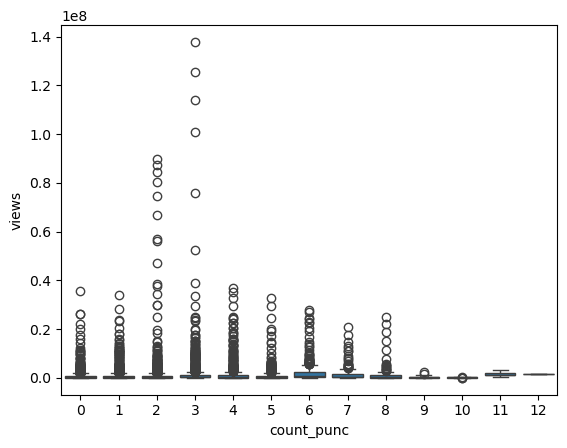

In [159]:
sns.boxplot(d[:10000], x = 'count_punc', y = 'views')

In [160]:
# Inference - If the punctuation count is 2 or 3,probability of number of views can be high

<Axes: xlabel='count_punc', ylabel='likes'>

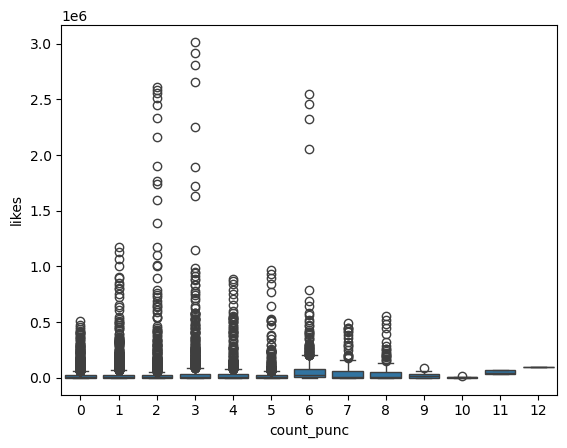

In [161]:
sns.boxplot(d[:10000], x = 'count_punc', y = 'likes')

In [162]:
# Inference - If the punctuation count is 2, 3 and in some exceptional cases, 6, probability of number of likes can be high

<Axes: xlabel='count_punc', ylabel='dislikes'>

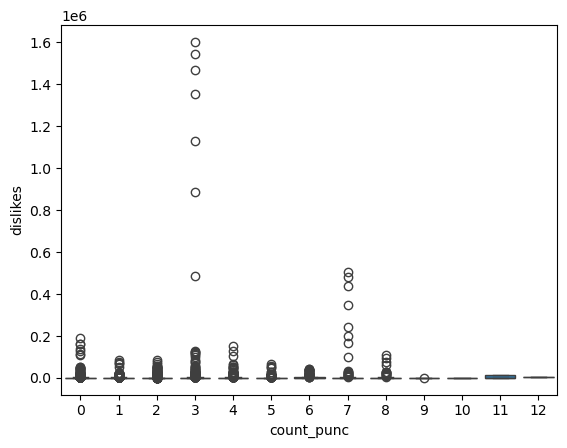

In [164]:
sns.boxplot(d[:10000], x = 'count_punc', y = 'dislikes')

In [165]:
# Inference - If the punctuation count is 3 or 7, probability of number of dislikes can be high

<Axes: xlabel='count_punc', ylabel='comment_count'>

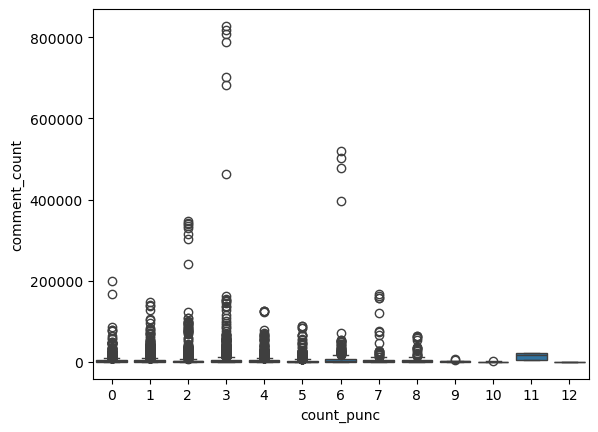

In [166]:
sns.boxplot(d[:10000], x = 'count_punc', y = 'comment_count')

In [ ]:
# Inference - If the punctuation count is 3, probability of number of dislikes can be high